# LAB 01: LAYOFFS 2023

## Mô tả đồ án:
- Từ nguồn dữ liệu lấy được từ Kaggle về vấn đề sa thải nhân viên ở các công ty trên toàn thế giới, đồ án này nhằm mục đích phân tích dữ liệu đã có để có được cái nhìn khách quan hơn về vấn đề này.

---

### Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from scipy import stats
from wordcloud import WordCloud
import calendar
import warnings
warnings.filterwarnings('ignore')

---

### <span style="color:yellow"> A. Thu thập dữ liệu</span>


#### Ngữ cảnh thực hiện tìm kiếm dữ liệu

Sau dịch covid 19, các công ty công nghệ trên toàn cầu đang đối mặt với sự suy thoái kinh tế. Sự chậm lại của chi tiêu từ người tiêu dùng, lãi suất cao hơn từ các ngân hàng trung ương và sức mạnh của đồng đô la ngoại tệ đang gợi ý về khả năng xảy ra suy thoái kinh tế và các công ty công nghệ đã bắt đầu **cắt giảm nhân sự**.

#### Chủ đề

Phân tích tình trạng hỗn loạn công nghệ gần đây thông qua số liệu về việc sa thải nhân sự, từ đó rút ra được những thông tin hữu ích.

#### Nguồn
Dữ liệu được lấy trên Kaggle dưới file csv, đường link dẫn đến  [Ở đây](https://www.kaggle.com/datasets/swaptr/layoffs-2022?resource=download)

#### Người ta có cho phép sử dụng dữ liệu như thế này hay không?

Thông tin License của dữ liệu: Open Database.

Theo thông tin License của dữ liệu, người dùng được phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu trong khi duy trì sự tự do tương tự cho người dùng khác.

#### Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?

Dữ liệu được thu thập bằng cách theo dõi số liệu được báo cáo trên các nền tảng:
- Bloombreg
- San Francisco Business Times
- TechCrunch
- The New York Times

Phương pháp thu thập dữ liệu: Dữ liệu được tải xuống từ Layoffs.fyi Tracker và được biên soạn thành 1 file CSV.

#### Đọc dữ liệu

In [2]:
df=pd.read_csv('./datasets/layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,2023-03-06,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,2023-03-06,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,2023-03-06,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,Unknown,Brazil,788.0


---

### <span style="color:yellow"> B. Khám phá dữ liệu</span>


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [3]:
# df['stage']

- Mỗi dòng chứa dữ liệu về một công ty và các thông tin liên quan đến công ty đó như: tên công ty, nơi đặt trụ sở chính, loại ngành nghề, số nhân viên bị sa thải, tỷ lệ sa thải, ngày công bố, giai đoạn của công ty, quốc gia công ty hoạt động, số vốn huy động bởi công ty.

- ví dụ: dòng 1: doanh nghiệp SiriusXM có trụ sở tại New York City và hoạt động trong ngành truyền thông, đã sa thải 475 nhân viên, chiếm 8% tổng số nhân viên của họ tính tới ngày 6 tháng 3 năm 2023. Công ty cũng đang ở giai đoạn Post-IPO và có trụ sở tại Hoa Kỳ. Họ đã huy động được số vốn 525 triệu đô la.

- Không có tình trạng các dòng có ý nghĩa khác nhau.

#### Mỗi cột có ý nghĩa gì?

In [4]:

# print("total columns: ",len(df.columns)) 

# for column in range(len(df.columns)) :
#     print("column ", column," ", df.columns[column])
#     print("size: ", len(df.loc[:, df.columns[column]]))
#     print("number of values: ", len(df.loc[:, df.columns[column]].unique()), "\n")
#     print("head: ", ' ,'.join(df.loc[:, df.columns[column]].unique()) )

column=2
print("column ", column,": ", df.columns[column])
print("size: ", len(df.loc[:, df.columns[column]]))
print("number of values: ", len(df.loc[:, df.columns[column]].unique()))
# print(df.loc[:, df.columns[column]].unique())
arr= df.loc[:, df.columns[column]].unique()

nanIndex=-1
for index in range(len(arr)):
    if isinstance(arr[index], float) and np.isnan(arr[index]):
        nanIndex=index
        break
if nanIndex != -1:
    arr=np.delete(arr,nanIndex)

print("number of values (without nan): ", len(arr))

# print for string type
print("data (without nan) : ", ', '.join(arr))

# print for number type
# print( ", ".join(map(str, arr)))

    

column  2 :  industry
size:  2357
number of values:  30
number of values (without nan):  29
data (without nan) :  Other, Media, Retail, Education, Real Estate, Transportation, Marketing, Travel, Healthcare, Security, Food, Fitness, Consumer, Logistics, HR, Support, Crypto, Finance, Data, Sales, Infrastructure, Hardware, Product, Construction, Legal, Energy, Manufacturing, Recruiting, Aerospace


## Thông tin của mỗi cột:
- Company: Tên của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 1893
    - Một số Company có trong dữ liệu: Atlassian, SiriusXM, Alerzo, UpGrad, Loft, Embark Trucks,...
- Location: Nơi đặt trụ sở chính của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 191
    - Một số Location có trong dữ liệu: Sydney, New York City, Ibadan, Mumbai, Sao Paulo,...

- Industry: Loại ngành mà công ty hoạt động
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 30
    - Một số Industry có trong dữ liệu: Other, Media, Retail, Education, Real Estate, Transportation,...

- Total_laid_off: Tổng số nhân viên bị sa thải bởi công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 286
    - Một số Total_laid_off có trong dữ liệu: 475.0, 400.0, 120.0, 340.0, 230.0, 100.0, 63.0, 30.0...

- Percentage_laid_off: Tỷ lệ nhân viên bị sa thải bởi công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 76
    - Một số Percentage_laid_off có trong dữ liệu: 0.05, 0.08, 0.15, 0.7, 0.03, 0.11, 0.1, 1.0...

- Date: Ngày công bố thông tin về việc sa thải
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 191
    - Một số Date có trong dữ liệu: 2023-03-06, 2023-03-03, 2023-03-02, 2023-03-01, 2023-02-28,...

- Stage: Giai đoạn của công ty
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 17
    - Một số Stage có trong dữ liệu: Post-IPO, Series B, Unknown, Acquired, Series F, Series E...

- Country: Quốc gia nơi công ty đặt trụ sở
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 59
    - Một số Country có trong dữ liệu:  Australia, United States, Nigeria, India, Brazil,...

- Funds_raised: Tổng số vốn do công ty huy động (tính bằng triệu đô la)
    - Kích thước: 2357
    - Số lượng dữ liệu không trùng lắp: 639
    - Một số Funds_raised có trong dữ liệu: 525.0, 16.0, 631.0, 788.0, 317.0, 59.0, 152.0...

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [5]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [6]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(col,":",set(df[col].apply(type)))

company : {<class 'str'>}
location : {<class 'str'>}
industry : {<class 'str'>, <class 'float'>}
date : {<class 'str'>, <class 'float'>}
stage : {<class 'str'>, <class 'float'>}
country : {<class 'str'>}


Chúng ta nhận thấy rằng ba cột `industry`, `date` và `stage` có dạng dữ liệu không đồng nhất, tuy nhiên đây chỉ là do sự thiếu hụt dữ liệu trong các dòng, được biểu thị bằng giá trị `NaN` (dạng số thực).

#### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

Các cột sau đang có kiểu dữ liệu là `object`, do đó cần được chuyển đổi sang kiểu chuỗi (`string`):

* `company`
* `location`
* `industry`
* `stage`
* `country`

Trong khi đó, cột `date` đang có kiểu dữ liệu là `object`, cần được chuyển đổi sang kiểu ngày tháng (`datetime`).

#### Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2357 non-null   object 
 1   location             2357 non-null   object 
 2   industry             2356 non-null   object 
 3   total_laid_off       1618 non-null   float64
 4   percentage_laid_off  1573 non-null   float64
 5   date                 2356 non-null   object 
 6   stage                2351 non-null   object 
 7   country              2357 non-null   object 
 8   funds_raised         2148 non-null   float64
dtypes: float64(3), object(6)
memory usage: 165.9+ KB


Quan sát thấy có số lượng lớn dữ liệu bị thiếu và có những cột phải xử lý kiểu dữ liệu do vậy ta phải tiền xử lý dữ liệu.

### Tiền xử lý dữ liệu

Missing data:
industry                 1
total_laid_off         739
percentage_laid_off    784
date                     1
stage                    6
funds_raised           209
dtype: int64


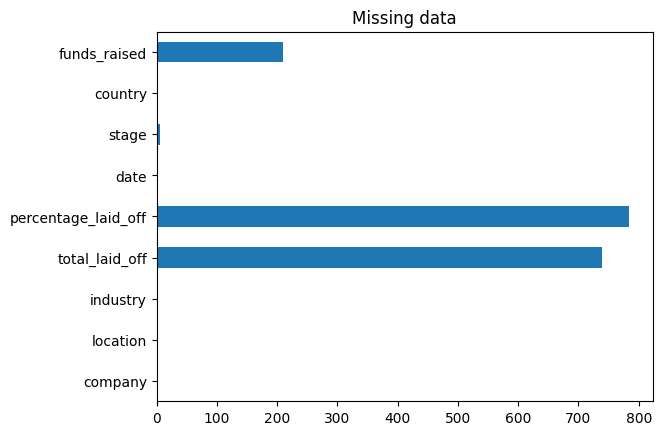

Percentage missing data:
industry                0.042427
total_laid_off         31.353415
percentage_laid_off    33.262622
date                    0.042427
stage                   0.254561
funds_raised            8.867204
dtype: float64
Number of rows duplicated: 1


In [8]:
# Kiểm tra missing data
have_Nan=df.columns[df.isna().any()]

# Đếm số missing data của các cột có missing data
print("Missing data:")
print(df[have_Nan].isnull().sum())
df.isna().sum().plot(kind="barh",title='Missing data')
plt.show()

# Phần trăm dữ liệu bị thiểu của những cột này
print("Percentage missing data:")
percentage_missing_data=df[have_Nan].isnull().sum() * 100 / df.shape[0]
print(percentage_missing_data)

# Kiểm tra có dữ liệu bị duplicate không
print("Number of rows duplicated: "+str(df[df.duplicated()].shape[0]))


Ta thấy có một số lượng khá lớn dữ liệu bị thiếu ở cột `total_laid_off`,`percentage_laid_off` và `funds_raised` . Vì có những cột dữ liệu bị thiếu lên đến hơn 30% nên ta không thể chọn phương án bỏ toàn bộ những dòng nào bị thiếu dữ liệu. Bên cạnh đó có tồn tại 1 dòng bị trùng ta cũng cần phải xử lý. 

- Đầu tiên ta loại bỏ những dòng có dữ liệu bị thiếu ở cột `industry`,`date` và `stage` vì số lượng bị thiếu không đáng kể.
- Xóa dòng bị trùng dữ liệu.
- Loại bỏ những dòng mà bị thiếu cả hai trường quan trọng là `total_laid_off` và `percentage_laid_off` vì những dòng này không có ý nghĩa để ta phân tích.
- Tiếp theo tùy theo hướng phân tích ta sẽ chọn những cột dữ liệu phù hợp. tạm thời ta sẽ fill bằng 0.

In [9]:
# Loại bỏ những dòng có dữ liệu bị thiếu ở cột `industry`,`date` và `stage`
df = df[~df['industry'].isna()]
df = df[~df['date'].isna()]
df = df[~df['stage'].isna()]

# Xóa dòng bị trùng dữ liệu.
df = df[~df.duplicated()]

# Loại bỏ những dòng mà bị thiểu cả hai trường quan trọng là `total_laid_off` và `percentage_laid_off`
df = df[~(df['total_laid_off'].isna()&df['percentage_laid_off'].isna())]

# 
df = df.fillna(0)
print("After fill null:")
print(df.isna().sum())

After fill null:
company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64


Sau khi đã tạm thời xử lý các dữ liệu bị thiếu ta bắt đầu xử lý kiễu dữ liệu của các cột.

- Chuyển data type của cột `date` sang dạng `datetime`.
- Chuyển data type của các cột đang là dạng `object ('str')` sang dạng `category`

In [10]:
# Chuyển data type của cột `date` sang dạng `datetime`.
df['date']=pd.to_datetime(df['date'])
# Chuyển data type của các cột đang là dạng `object` sang dạng `category`
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col]=df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              1988 non-null   category      
 1   location             1988 non-null   category      
 2   industry             1988 non-null   category      
 3   total_laid_off       1988 non-null   float64       
 4   percentage_laid_off  1988 non-null   float64       
 5   date                 1988 non-null   datetime64[ns]
 6   stage                1988 non-null   category      
 7   country              1988 non-null   category      
 8   funds_raised         1988 non-null   float64       
dtypes: category(5), datetime64[ns](1), float64(3)
memory usage: 178.3 KB


Đã xữ lý xong kiểu dữ liệu của các cột. Giờ ta quan sát đến giá trị dữ liệu bên trong các cột.

In [11]:
# Sắp xếp df theo tên company để quan sát cột `company`
print(df.sort_values('company')['company'].unique())
a=df['company'].unique()
b=df['company'].str.upper().unique()
print(a.shape[0])
print(b.shape[0])

[' Included Health', '#Paid', '&Open', '100 Thieves', '10X Genomics', ..., 'iFood', 'iPrice Group', 'iRobot', 'nCino', 'uShip']
Length: 1629
Categories (1629, object): [' Included Health', '#Paid', '&Open', '100 Thieves', ..., 'iPrice Group', 'iRobot', 'nCino', 'uShip']
1629
1624


Số lượng tên công ty:

-   Data gốc: 1629
-   Data sau khi đưa tất cả về uppercase: 1624

Ta thấy có sự khác nhau về số lượng tên công ty khi ta giữ nguyên data gốc và sau khi đưa tất cả về uppercase -> Có những tên của cùng một công ty nhưng chưa được chuẩn hóa cùng 1 quy tắc.
-> Đưa tất cả về 1 loại (uppercase) và ta cũng phải xóa các khoảng trắng thừa trong tên công ty phòng trường hợp có tên công ty bị thừa khoảng trắng.

In [12]:
# Xử lý dữ liệu cột `company`
df['company']=df['company'].str.upper()
df['company']=df['company'].str.split().str.join(" ")
df['company'].unique().shape[0]

1621

Xử lý tương tự cho cột `location`, `industry`, `stage` và `country`.

In [13]:
# Xử lý dữ liệu cột `location`
df['location']=df['location'].str.upper()
df['location']=df['location'].str.split().str.join(" ")
df['location'].unique().shape[0]

166

In [14]:
# Xử lý dữ liệu cột `industry`
df['industry']=df['industry'].str.upper()
df['industry']=df['industry'].str.split().str.join(" ")
df['industry'].unique().shape[0]

29

In [15]:
# Xử lý dữ liệu cột `stage`
df['stage']=df['stage'].str.upper()
df['stage']=df['stage'].str.split().str.join(" ")
df['stage'].unique().shape[0]

16

In [16]:
# Xử lý dữ liệu cột `country`
df['country']=df['country'].str.upper()
df['country']=df['country'].str.split().str.join(" ")
df['country'].unique().shape[0]

51

Tiếp theo ta kiểm tra những cột có kiễu dữ liệu là số để xem có xuất hiện dữ liệu không hợp lệ không.
- Có dòng nào chứa số âm không?
- `percentage_laid_off` có giá trị nào lớn hơn 1 không?

In [17]:
# Kiểu tra giá trị âm
print("Negative total_laid_off: "+str(sum(df.total_laid_off<0)))
print("Negative percentage_laid_off: "+str(sum(df.percentage_laid_off<0)))
print("Negative funds_raised: "+str(sum(df.funds_raised<0)))

# Kiểm tra giá trị `percentage_laid_off` không hợp lệ
print("percentage_laid_off greater than 1: "+str(sum(df.percentage_laid_off>1)))

Negative total_laid_off: 0
Negative percentage_laid_off: 0
Negative funds_raised: 0
percentage_laid_off greater than 1: 0


Sau khi đã xử lý xong tất cả ta sắp xếp và reset index của data.

In [18]:
df=df.sort_values('company')
df=df.reset_index(drop=True)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,#PAID,TORONTO,MARKETING,19.0,0.17,2023-01-27,SERIES B,CANADA,21.0
1,&OPEN,DUBLIN,MARKETING,9.0,0.09,2022-11-17,SERIES A,IRELAND,35.0
2,100 THIEVES,LOS ANGELES,CONSUMER,12.0,0.00,2022-07-13,SERIES C,UNITED STATES,120.0
3,10X GENOMICS,SF BAY AREA,HEALTHCARE,100.0,0.08,2022-08-04,POST-IPO,UNITED STATES,242.0
4,1STDIBS,NEW YORK CITY,RETAIL,70.0,0.17,2020-04-02,SERIES D,UNITED STATES,253.0


### Thêm cột total_employee để phục phụ phân tích sau này

In [19]:


df_with_total_employees=df.sort_values(by='total_laid_off',ascending=False)
df_with_total_employees=df_with_total_employees.reset_index(drop=True)
df_with_total_employees=df_with_total_employees[df_with_total_employees['percentage_laid_off']>0]
df_with_total_employees['total_employees']=round(df_with_total_employees['total_laid_off']/df_with_total_employees['percentage_laid_off'])
df_with_total_employees=df_with_total_employees[df_with_total_employees['total_employees']>0]
df_with_total_employees=df_with_total_employees.sort_values(by='total_employees',ascending=False)
df_with_total_employees=df_with_total_employees.reset_index(drop=True)



In [20]:
df2=df_with_total_employees.groupby('company')['total_employees'].max()
df2.sort_values(ascending=False).head(10)

company
AMAZON        400000.0
GOOGLE        200000.0
MICROSOFT     200000.0
IBM           195000.0
DELL          133000.0
ERICSSON      106250.0
SAP           100000.0
SALESFORCE    100000.0
META           84615.0
CISCO          82000.0
Name: total_employees, dtype: float64

### Mối liên hệ giữa cột dữ liệu Stage và Percentage_laid_off, liệu nó có liên quan tới nhau hay không ?  Liễu 

### Xét từng quốc gia, thể hiện bằng biểu đồ cột cho thấy số lượng người bị sa thải của các ngành. Trí 

### ngành nào đang có số lượng layoff cao nhất trên thế giới - Yến 

### Xét tất cả các ngành, dùng biểu đồ cột thể hiện số lượng quốc gia có ngành nghề đó layoff top đầu / cuối. Hưng 

Các bước thực hiện: Với mỗi industry ta sẽ tìm số lượng country laid off:
- Lọc ra các country
- Với mỗi country, đếm số lượng total_laid_off
- Nếu total_laid_off của country tương ứng khác 0 thì số lượng country laid off tăng lên 1
Sau khi đã có số lượng country laid off, ta trực quan bằng biểu đồ cột với trục x là industry và y là số lượng country laid off tương ứng với industry đó. (xem hình bên dưới)

Nhận xét:
- Industry có số lượng country laid off cao nhất là finance (số lượng: 20)
- Industry có số lượng country laid off thấp nhất là manufacturing (số lượng: 1)

29
   industry  total countries
12  FINANCE               20
         industry  total countries
24  MANUFACTURING                1


<Axes: xlabel='industry', ylabel='total countries'>

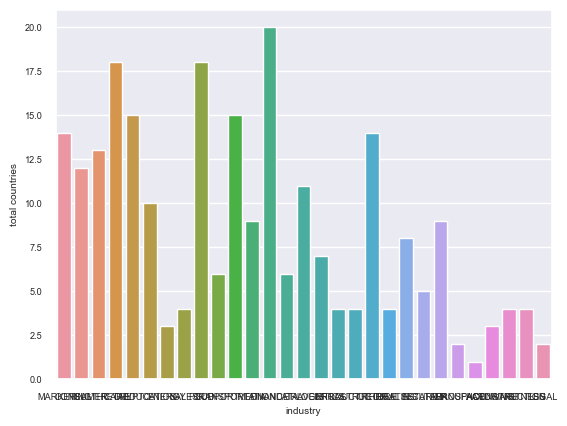

In [21]:
x= df["industry"].unique()
print(len(x))
y=[]
z=0

for i in range(len(df["industry"].unique())):
    industryData= df["industry"].unique()[i]
    industryRows = df[df["industry"]==industryData]
    countryArr = industryRows["country"].unique()

    res1=0
    for item in industryRows["total_laid_off"]:
        res1+=item
    # print(res1)


    totalArrCountry = []

    for item in countryArr:
        rows = industryRows[industryRows["country"]==item]
        totalArr = rows["total_laid_off"]
        sumTmp=0
        for total in totalArr:
            sumTmp+=total
        # print(sumTmp)
        totalArrCountry.append(sumTmp)

    result=0
    for item in range(len(countryArr)):
        if totalArrCountry[item]!=0:
            result+=1

    y.append(result)
    z+=result


d = {'industry': x, 'total countries': y}
totalCountryByIndustry = pd.DataFrame(data=d)
# totalCountryByIndustry

print(totalCountryByIndustry[totalCountryByIndustry["total countries"]==totalCountryByIndustry["total countries"].max()])
print(totalCountryByIndustry[totalCountryByIndustry["total countries"]==totalCountryByIndustry["total countries"].min()])



sns.set(font_scale=0.6)
# sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(data=totalCountryByIndustry, x="industry", y="total countries",)




### Thêm total_employee để chọn ra top company theo quy mô nhân sự. Từ đây phát triễn các phân tích trên nhóm top company. Yến  

### Câu 16
Có 1 số điểm thú vị trong dữ liệu đang tìm từ từ. VD: 

 1 số company mà percentage_laid_off=1 tức là toàn bộ công ty đó bị sa thải --> bankrupt. -> KHÁM PHÁ PHÁ SẢN 

Công ty nào sa thải nhân viên và những dịp lễ đặc biệt (eg: Christmas...) nhiều nhất? Số lượng? 

Thời điểm nào lay off nhiều nhất (Tháng/quý/năm - stack bar) 

### Địa điểm tiêu biểu nơi xảy ra lay off

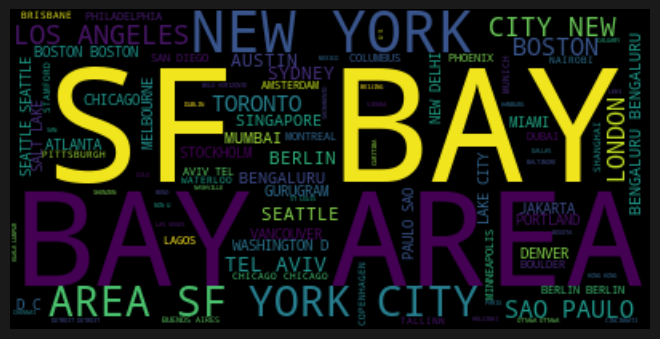

In [22]:

plt.figure(facecolor='k')
wordcloud = WordCloud(width=400, height=200,max_font_size=100).generate(' '.join(df['location']))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

San Francisco area bay với Silicon Valley nổi tiếng lại cũng là nơi diễn ra lay off nhiều nhất :(

In [23]:
df_clean_total_lo=df[df['total_laid_off']>0]
df_clean_total_lo['date'].min()
df_clean_total_lo['date'].max()

#
df_clean_total_lo['month_year'] = pd.to_datetime(df_clean_total_lo['date']).dt.strftime('%Y-%m')





total_by_month_year = df_clean_total_lo.groupby('month_year').sum()['total_laid_off']
total_by_month_year.reindex(pd.period_range('2020-01',total_by_month_year.index[-1],freq='M'))
total_by_month_year.fillna(0.0)
total_by_month_year.max()
# lo_2020=lo_2020.reindex(pd.RangeIndex(1,13),fill_value= 0).ffill()
# total_by_month_year.reset_index().rename(columns={'sum':'valuesum'})



84424.0

## Số lượng lay off theo thời gian

In [24]:
df_total_employees_time=df_with_total_employees[df_with_total_employees.total_laid_off>0]
df_total_employees_time['year']=df_total_employees_time['date'].apply(lambda x :x.year)
df_total_employees_time['month']=df_total_employees_time['date'].apply(lambda x :x.month)
df_total_employees_time['month_year'] = pd.to_datetime(df_total_employees_time['date']).dt.strftime('%Y-%m')



array([30], dtype=int64)

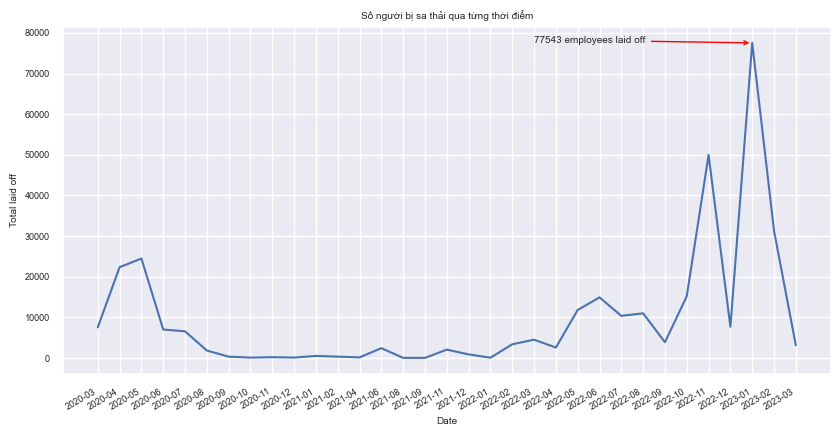

In [57]:
total_by_time=df_total_employees_time.groupby('month_year').sum()['total_laid_off']

fig, ax = plt.subplots( figsize=(9, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
plt.plot(total_by_time.index,total_by_time.values)
plt.xlabel('Date')
plt.ylabel('Total laid off')
plt.title('Số người bị sa thải qua từng thời điểm')


x_max=np.where(total_by_time == total_by_time.max())[0]
y_max=total_by_time.max()
plt.annotate(f'{int(y_max)} employees laid off', xy=(x_max, y_max), xytext=(x_max-10, y_max),arrowprops=dict(arrowstyle='->',color='red'))
# beautify the x-labels
plt.gcf().autofmt_xdate()
# plt.show()
x_max

Làng sóng lay off diễn ra mạnh mẽ nhất từ tháng 9 2022 và đạt đỉnh vào tháng 1 2023 với tổng cộng gần 80 ngàn người bị sa thải trong 1 tháng.

### Số lượng lay off theo tháng

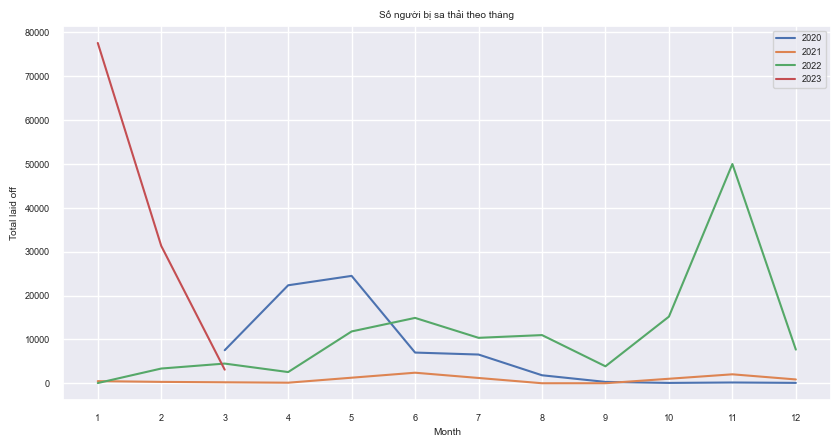

In [26]:

analysis_year = df_total_employees_time.groupby(["year"],sort=True)
fig, ax = plt.subplots( figsize=(9, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
for year, dfx in analysis_year:
    df_m=dfx.groupby('month').sum()['total_laid_off']
    plt.plot(df_m.index,df_m.values,label=f'{year}')

plt.xticks(np.arange(1, 13, 1))
plt.xlabel('Month')    
plt.ylabel('Total laid off')   
plt.title('Số người bị sa thải theo tháng') 
plt.legend()


## Liệu có đợt lay off này diễn ra vào holiday week?

*holiday week: Tuần lễ cuối cùng của năm gồm cả Christmas (25/12) và ngày đầu năm mới (01/01). Đây là dịp lễ lớn ở các nước phương tây.

In [27]:
df_time=df.set_index('date',drop=True)
holiday_laid_off_2021=df_time['2020-12-24':'2021-01-01']
holiday_laid_off_2022=df_time['2021-12-24':'2022-01-01']
holiday_laid_off_2023=df_time['2022-12-24':'2023-01-01']

In [28]:
print(holiday_laid_off_2021)

Empty DataFrame
Columns: [company, location, industry, total_laid_off, percentage_laid_off, stage, country, funds_raised]
Index: []


In [29]:
print(holiday_laid_off_2022)

Empty DataFrame
Columns: [company, location, industry, total_laid_off, percentage_laid_off, stage, country, funds_raised]
Index: []


In [30]:
print(holiday_laid_off_2023)


                    company     location industry  total_laid_off  \
date                                                                
2022-12-27         BILIBILI     SHANGHAI    MEDIA             0.0   
2022-12-25          ELEMENT       LONDON    OTHER             0.0   
2022-12-27  OCTOPUS NETWORK  BEAU VALLON   CRYPTO             0.0   
2022-12-26             PAYU    AMSTERDAM  FINANCE           150.0   

            percentage_laid_off     stage         country  funds_raised  
date                                                                     
2022-12-27                 0.30  POST-IPO           CHINA        3700.0  
2022-12-25                 0.15  SERIES B  UNITED KINGDOM          96.0  
2022-12-27                 0.40  SERIES A      SEYCHELLES           8.0  
2022-12-26                 0.06  ACQUIRED     NETHERLANDS           0.0  


Kết quả ta thấy cuối năm 2022 có 4 công ty cho một số lượng khá lớn nhân viên nghỉ khỏe ngay trong thời gian diễn ra trong holiday week 😥.

### Với mỗi đợt sa thải, các công ty thường cho nghỉ bao nhiêu phần trăm nhân sự?

In [31]:
df_clean_percentage=df[df['percentage_laid_off']>0]
df_clean_percentage['percentage_laid_off']=df_clean_percentage['percentage_laid_off']*100
df_clean_percentage['percentage_lo_range']=pd.cut(x=df_clean_percentage['percentage_laid_off'], bins=[0, 10, 20, 30,
                                          40,50,60,70,80,90,100],labels=['0-10', '10-20', '20-30',
                                          '30-40','40-50','50-60','60-70','70-80','80-90','90-100'],include_lowest=True)

<Axes: title={'center': 'Số đợt sa thải theo quy mô phần trăm nhân sự mỗi đợt'}, xlabel='percentage laid off (%)', ylabel='Number of times laid off happend'>

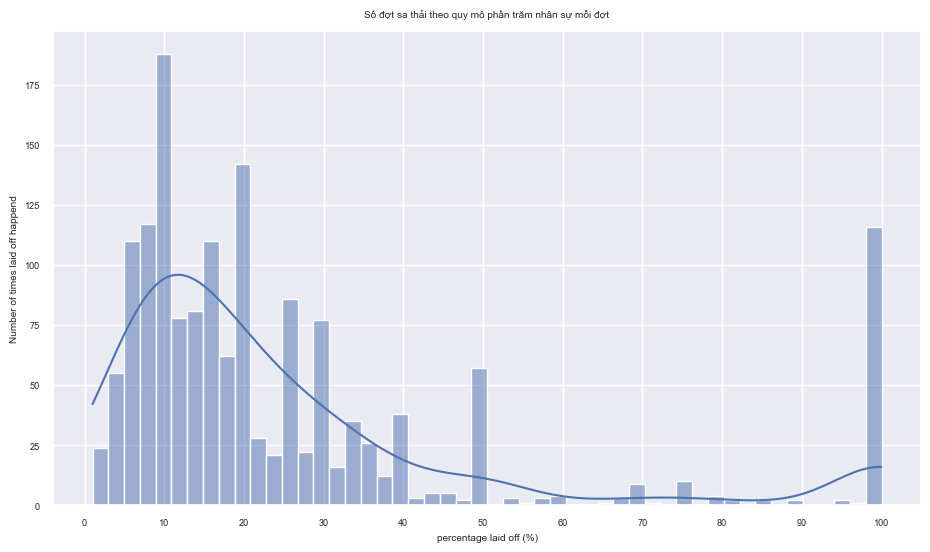

In [32]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
fig.tight_layout(pad=5.0)
ax.set_xticks(np.arange(0, 101, 10))
ax.set_title( 'Số đợt sa thải theo quy mô phần trăm nhân sự mỗi đợt',wrap=True,pad=10)
ax.set_xlabel('percentage laid off (%)')
ax.set_ylabel('Number of times laid off happend')
sns.histplot(df_clean_percentage['percentage_laid_off'], kde=True, bins=50)

Ta thấy biểu đồ có 2 đỉnh. Đỉnh lớn nằm quanh 10% cho ta nhận định với mỗi đợt sa thải thì khoảng 10% nhân sự là con số ưu thích của các công ty. Biểu đồ lệch trái cho thấy các công ty có xu hướng luôn có gắng để sa thải ít hơn 50% nhân sự mỗi đợt. Điều thú vị khác là đỉnh thứ 2 nằm ở mức 100%. Điều này có thể liên quan đến các công ty quy nhỏ, toàn bộ các thành viên gắng kết với nhau đến những giây phút cuối cùng ?!?

### Top 20 công ty có tổng % số lượng nhân sự bị sa thải nhiều nhất

Text(81.125, 0.5, 'Company')

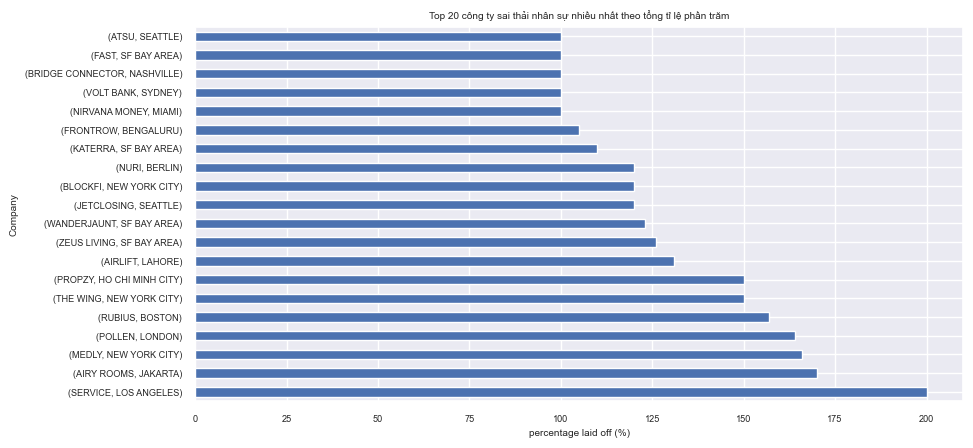

In [33]:
fig, ax = plt.subplots( figsize=(9, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
top_20 = df.groupby(['company','location']).sum().sort_values(by='percentage_laid_off',ascending=False).head(20)['percentage_laid_off'] * 100.0
top_20.plot(kind='barh',ax=ax)
ax.set_title('Top 20 công ty sai thải nhân sự nhiều nhất theo tổng tỉ lệ phần trăm')
ax.set_xlabel('percentage laid off (%)')
ax.set_ylabel('Company')

Ta có thể thấy là có nhiều công ty sa thải với tổng hơn cả 100% nhân sự. Nguyên do là vì họ đã sa thải- tuyển lại và tiếp tục sa thải tiếp trong nhiều đợt . Một ví dụ là công ty `Air rooms`, ngày 2020-04-22 họ sa thải 70% nhân sự và sau đó vào ngày 2020-05-07 họ tiếp tục sa thải toàn bộ 100% nhân sự. Cá biệt có công ty `Service` trụ sở tại Los Angeles đã sai thải 2 lần với quy mô mỗi lần là 100% nhân sự chỉ cách nhau vài ngày 💀.

In [34]:
print(df[df.company=='AIRY ROOMS'])
print(df[df.company=='SERVICE'])

       company location industry  total_laid_off  percentage_laid_off  \
44  AIRY ROOMS  JAKARTA   TRAVEL             0.0                  1.0   
45  AIRY ROOMS  JAKARTA   TRAVEL             0.0                  0.7   

         date    stage    country  funds_raised  
44 2020-05-07  UNKNOWN  INDONESIA           0.0  
45 2020-04-22  UNKNOWN  INDONESIA           0.0  
      company     location industry  total_laid_off  percentage_laid_off  \
1487  SERVICE  LOS ANGELES   TRAVEL             0.0                  1.0   
1488  SERVICE  LOS ANGELES   TRAVEL             0.0                  1.0   

           date stage        country  funds_raised  
1487 2020-03-16  SEED  UNITED STATES           5.1  
1488 2020-03-20  SEED  UNITED STATES           5.0  


### Tìm hiểu về các công ty sa thải hơn 50% nhân sự trong các đợt

In [35]:
more_than_50percent_laid_off=df_clean_percentage[df_clean_percentage.percentage_laid_off>=50]
# số lần sa thải có quy mô > 50% nhân viên
n_more_than_50percent_laid_off=more_than_50percent_laid_off.shape[0]

# số lần sa thải có quy mô 100% nhân viên
laid_off_all_employees =df_clean_percentage[df_clean_percentage.percentage_laid_off==100]
n_laid_off_all_employees = laid_off_all_employees.shape[0]
print("Tổng số đợt sa thải >50% nhân sự: "+str(n_more_than_50percent_laid_off))
print("Tổng số đợt sa thải 100% nhân sự: "+str(n_laid_off_all_employees))

Tổng số đợt sa thải >50% nhân sự: 220
Tổng số đợt sa thải 100% nhân sự: 116


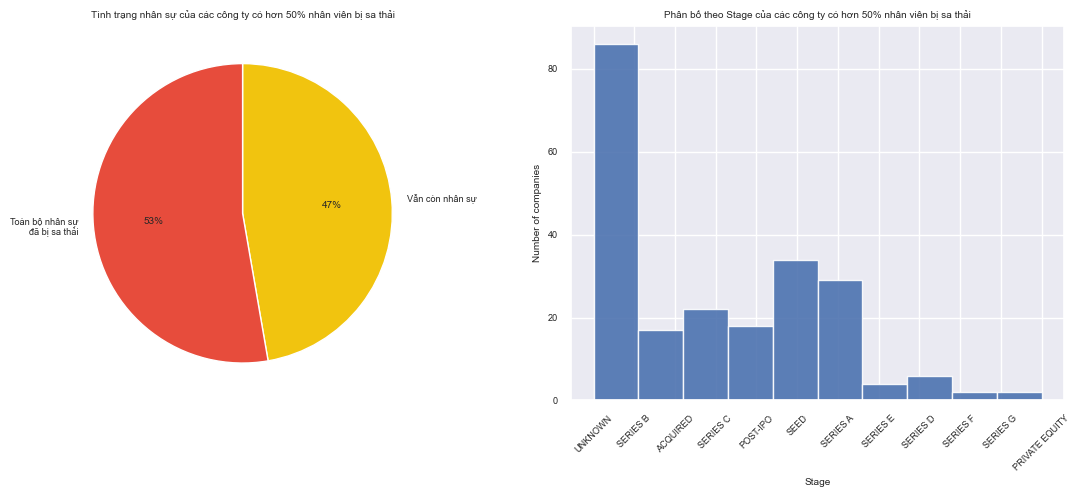

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
#pie chart
pie_lb=['\n'.join(wrap('Vẫn còn nhân sự', 15)),'\n'.join(wrap('Toàn bộ nhân sự đã bị sa thải', 15))]
ax1.pie([n_more_than_50percent_laid_off-n_laid_off_all_employees,n_laid_off_all_employees],labels=pie_lb,autopct='%.0f%%',counterclock=False, startangle=-270,colors=['#F1C40F','#E74C3C'])
ax1.set_title('Tình trạng nhân sự của các công ty có hơn 50% nhân viên bị sa thải',wrap=True)

#histogram
ax2.hist(more_than_50percent_laid_off['stage'],alpha=0.9)
plt.xticks(rotation=45)
ax2.set_xlabel('Stage')
ax2.set_ylabel('Number of companies')
ax2.set_title('Phân bố theo Stage của các công ty có hơn 50% nhân viên bị sa thải',wrap=True)
plt.show()

Dựa vào biểu đồ tròn ta thấy rằng, một khi đã sa thải hơn 50% nhân sự thì có tới hơn 53% đó sẽ là những lần sa thải toàn bộ 100% nhân sự. Ta có thiểu thấy mức độ nghiêm trọng của những lần sa thải hơn 50%, đa phần những công ty này đã không còn lựa chọn nào và có thể họ đã phá sản.

Nhìn vào biểu đồ histogram ta thấy rằng đa số những công ty thuộc nhóm ra thải nhiều này chủ yếu không có thông tin về `stage` hoặc thuộc những giai đoạn khởi đầu (`Seed`, `SeriesA`...). Những công ty này thiếu sự ổn định.

### Tìm hiểu mối quan hệ giữa Stage và Percentage laid off

In [37]:

df_clean_percentage['stage']=df_clean_percentage['stage'].sort_values()
table = pd.pivot_table(df_clean_percentage, values='percentage_laid_off', index='percentage_lo_range',columns='stage', aggfunc='count')
table=table.sort_values(by=['percentage_lo_range'],ascending=False)


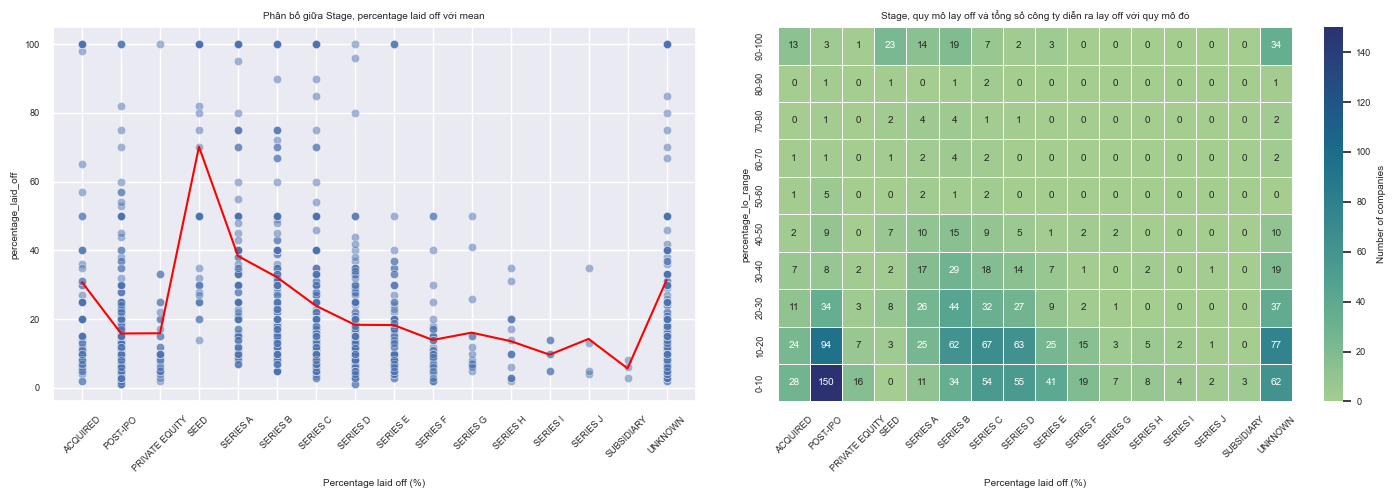

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5), tight_layout=True)

df_clean_percentage=df_clean_percentage.sort_values('stage',ascending=True)
fig.tight_layout(pad=5.0)
ax1.set_xlabel('Percentage laid off (%)')
plt.xticks(rotation=45)
ax1.set_title('Phân bố giữa Stage, percentage laid off với mean',wrap=True)
ax1.set_xticklabels(df_clean_percentage['stage'].unique(),rotation=45)

sns.scatterplot(x='stage', y='percentage_laid_off',data=df_clean_percentage, ax=ax1,alpha=0.5)

sns.lineplot(x='stage', y='percentage_laid_off',data=df_clean_percentage,ax=ax1,color='red',ci=None)


sns.heatmap(table, annot=True, fmt="d", linewidths=.5, ax=ax2,cmap="crest",cbar_kws={'label': 'Number of companies'})
ax2.set_title('Stage, quy mô lay off và tổng số công ty diễn ra lay off với quy mô đó',wrap=True)
ax2.set_xlabel('Percentage laid off (%)')
plt.xticks(rotation=45)
plt.show()


Một vài điểm đáng chú ý:
- Nhìn vào biểu đồ scatter và heatmap ta có thể thấy dữ liệu phân bố chủ yếu ở mức sa thải dưới 20% nhân sự mỗi đợt. 
- Nhìn và heat map ta thấy tương đồng nhiều nhất là 150 công ty ở stage `Post-IPO` có xu hướng sa thải >10% nhân sự.
- Nhìn vào mean line, các công ty có `stage` là `Seed` sa thải % nhân sự rất cao và không bao giờ sa thải dưới 10% nhân sự.
- Dữ liệu chủ yếu tập trung ở nhóm các công ty có stage từ `Series A` đến `Series E`. Nhóm này có xu hướng sa thải trung bình 10-20% mỗi đợt.
- Các công ty stage từ `Series F` đến `Series J` và `Subdiary` có rất ít dữ liệu sa thải và không bao giờ sa thải hơn 50% nhân sự trong một đợt. Có thể lý giải đây là các giai đoạn gọi vốn sau khi đã khá ổn định của các công ty nên ít diễn ra sa thải. Các công ty thuộc `Subdiary` thì có công ty mẹ chống lưng nên tình trạng cũng tương đối ổn định.

### Tìm hiểu quan hệ giữa percentage laid off và funds raised

Text(0.5, 1.0, 'Phân bố giữa funds raised và percentage laid off')

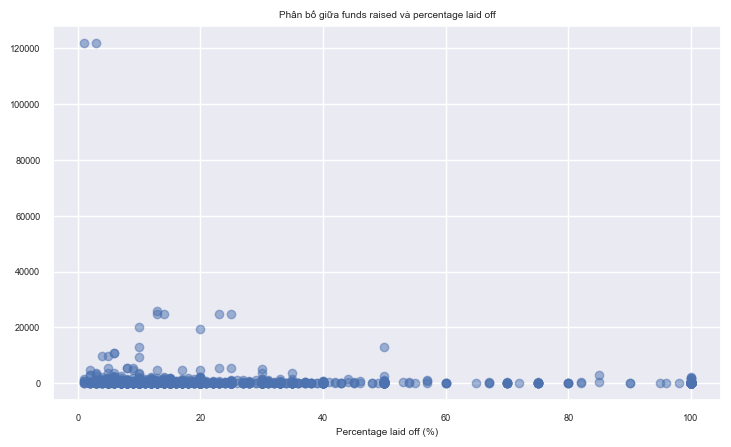

In [39]:

fig, ax = plt.subplots( figsize=(8, 5), tight_layout=True)
fig.tight_layout(pad=5.0)
#scatter 1
df_clean_percentage=df_clean_percentage.sort_values('stage',ascending=False)
ax.scatter(df_clean_percentage['percentage_laid_off'],df_clean_percentage['funds_raised'],alpha=0.5)
ax.set_xlabel('Percentage laid off (%)')
ax.set_title('Phân bố giữa funds raised và percentage laid off',wrap=True)
# ax.set_ylim([0, 28000])

### Tìm hiểu quan hệ giữa total layoff và total employees